# Training ML Models

In this section an ML-model will be trained in order to be able to predict student droput or academic success.

We need to use models for multi-class classification. Why? Because we want to predict if the student is a Dropout, Graduate, Enrolled. It cannot be classified to 2 categories (https://machinelearningmastery.com/types-of-classification-in-machine-learning/). 

## Imports

In [2]:
import importnb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


# Define Train and Test Data

In [5]:
X = df_filtered.drop('Target', axis = 1)
y = df_filtered['Target']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

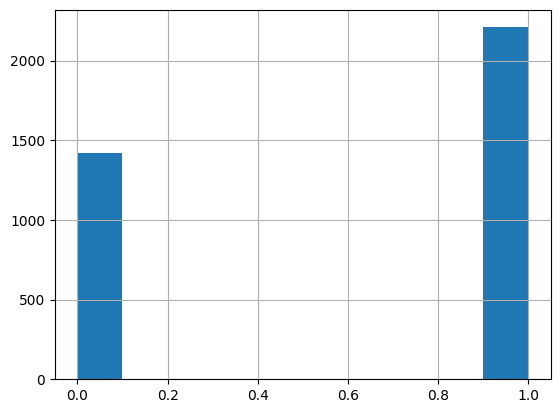

In [7]:
df_filtered["Target"].hist()
plt.show()

# 1. Lineare Regression

#### 1.1 Training the Model

In [6]:
model_linReg = LinearRegression()

model_linReg.fit(X_train, y_train)

pred_dropout = model_linReg.predict(X_test)

#### 1.2 Plotting the Model

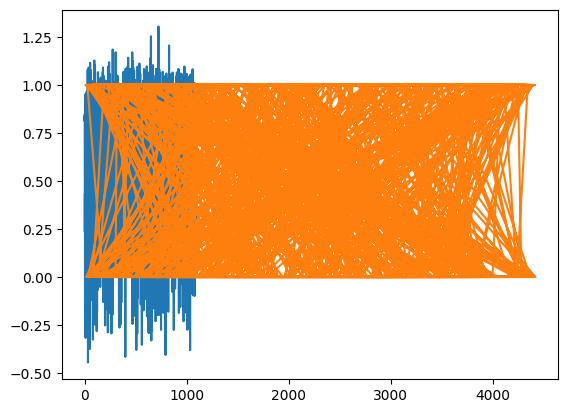

In [7]:
plt.plot(model_linReg.predict(X_test))
plt.plot(y_test)
plt.show()

#### 1.3 Evaluating the Model

In [8]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, pred_dropout))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, pred_dropout))
print('Coefficient of Determination (R2): ', model_linReg.score(X_test, y_test))


Mean Absolute Error (MAE):  0.21430653418831794
Mean Squared Error (MSE):  0.0913774600895557
Coefficient of Determination (R2):  0.6187904145816794


# 2. kNN 

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred_knn = knn.predict(X_test)

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [12]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [13]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [14]:
g_res.best_score_

0.8783943329397875

In [15]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [16]:
knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance',metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [18]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [19]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.8659320477502296


In [21]:
print(confusion_matrix(y_test, y_knn))

[[315 120]
 [ 26 628]]


In [20]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       435
           1       0.84      0.96      0.90       654

    accuracy                           0.87      1089
   macro avg       0.88      0.84      0.85      1089
weighted avg       0.87      0.87      0.86      1089



In [25]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8426997245179063


# 3. Random forest

In [15]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred_rf = model_rf.predict(X_test)

# 4. Decision Trees

In [26]:
model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
import time

In [30]:
# setup parameter space
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist()[0::2],
              'min_samples_split':np.arange(2,11).tolist()[0::2],
              'max_leaf_nodes':np.arange(3,26).tolist()[0::2]}

# create an instance of the grid search object
g = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1)

# conduct grid search over the parameter space
start_time = time.time()
g.fit(X_train,y_train)
duration = time.time() - start_time

# show best parameter configuration found for classifier
cls_params = g.best_params_
cls_params

{'criterion': 'gini',
 'max_depth': 7,
 'max_leaf_nodes': 13,
 'min_samples_split': 2}

In [31]:
model = g.best_estimator_
y_pred = model.predict(X_test)
print('accuracy score: %.2f' % accuracy_score(y_test,y_pred))
print('precision score: %.2f' % precision_score(y_test,y_pred))
print('recall score: %.2f' % recall_score(y_test,y_pred))
print('f1 score: %.2f' % f1_score(y_test,y_pred))
print('computation time: %.2f' % duration)

accuracy score: 0.87
precision score: 0.87
recall score: 0.92
f1 score: 0.89
computation time: 4.81


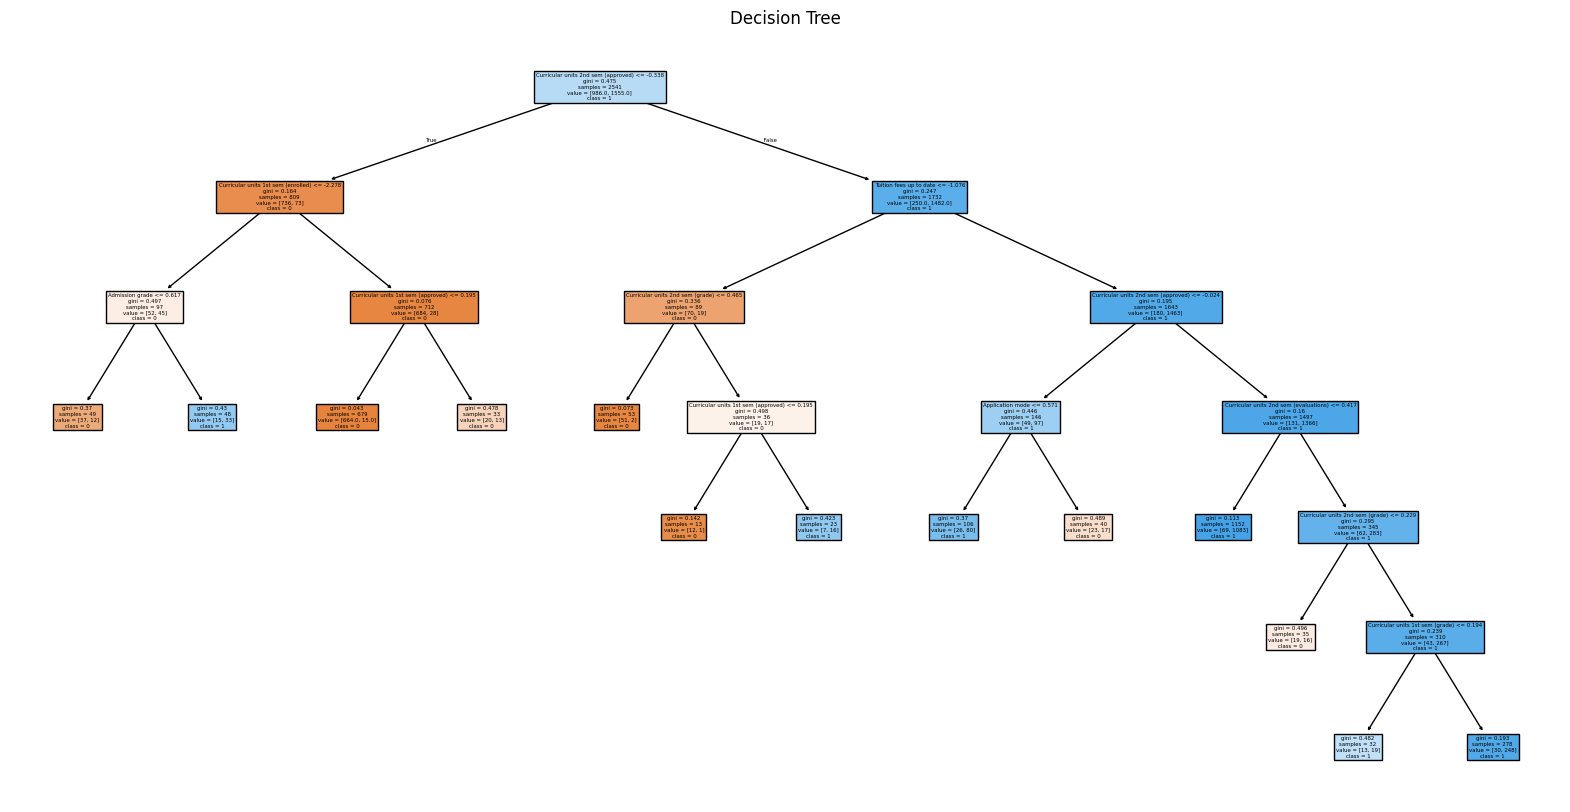

In [32]:
class_names = list(map(str, model.classes_))

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=df_filtered.columns[:-1], class_names=class_names)
plt.title('Decision Tree')
plt.show()

# 5. Naive Bayes

In [27]:
model_gb = GaussianNB()
model_gb.fit(X_train, y_train)

GaussianNB()

In [28]:
y_pred_gb = model_gb.predict(X_test)